## I310D Final Project: Medical Insurance Cost Analysis


---


Mia Saavedra, Tanya Arya,  Amolika Kondapalli, Jisoo Park

School of Information, The University of Texas at Austin

I 310D: Introduction to Human-Centered Data Science

Professor Abhijit Mishra

May 6 2024


---




**Dataset**

https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction

This dataset includes 2.7K rows and 7 columns that describe patients in terms of demographics, habits and medical insurance cost.

**Goal**

Analyze the factors that influence medical expenses including age, BMI, sex, smoking status, region, and number of children.

*Which factor has the greatest positive correlation with medical charges?*


## 0. Install and Import Libraries

In [37]:
import pandas as pd
import numpy as np
import scipy
!pip install researchpy
from matplotlib import pyplot as plt

##1. Convert Data to DataFrame
- Transformation to df

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

medical_insurance_df = pd.read_csv("medical_insurance.csv")

medical_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##2. Clean Data
- Delete duplicate rows
- Delete null attributes

In [39]:
# Report number of duplicates before removing
number_of_duplicates = medical_insurance_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = medical_insurance_df.drop_duplicates()

# Report number of duplicates after removing
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 1435
 Number of duplicates after removing : 0


In [40]:
# Remove rows with null attributes
final_data = final_data.dropna()

# Print the DataFrame after removing rows with null attributes
final_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
# Concise summary of Final DataFrame
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## 3. Descriptive Statistics & Vistualizations
- Uses df.describe() method
- Age, BMI, Charges displays histograms (distribution of continuous numerical data)
- Age, Sex, Smoker, Region, Number of Children displays pie charts (proportion of categorical data)

Age

Descriptive Statistics for Age


count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

(array([  0., 136., 113., 140., 107., 127., 131., 112., 144., 111., 125.,
         91.]),
 array([10.        , 14.58333333, 19.16666667, 23.75      , 28.33333333,
        32.91666667, 37.5       , 42.08333333, 46.66666667, 51.25      ,
        55.83333333, 60.41666667, 65.        ]),
 <BarContainer object of 12 artists>)

Text(0.5, 1.0, 'Histogram of Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

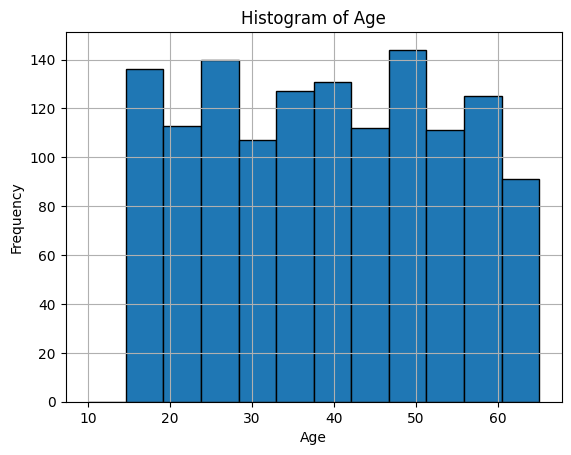

<Figure size 800x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d7c679f5330>,
 [Text(-1.0991110079097022, 0.04421529477136753, '20-29'),
  Text(-0.3224464496695637, -1.051678794640024, '40-49'),
  Text(0.9225454451417582, -0.5990908959817328, '50-59'),
  Text(0.8658030444330254, 0.6785168297474315, '30-39'),
  Text(-0.01909712345707568, 1.0998342147231397, '0-19'),
  Text(-0.6254528477642121, 0.9048805088096645, '60-69'),
  Text(-0.8426488543307087, 0.7070664101024347, '70+')],
 [Text(-0.5995150952234738, 0.02411743351165501, '20.9%'),
  Text(-0.17587988163794382, -0.5736429788945584, '20.9%'),
  Text(0.5032066064409589, -0.3267768523536724, '20.3%'),
  Text(0.4722562060543774, 0.37010008895314445, '19.2%'),
  Text(-0.010416612794768552, 0.5999095716671671, '10.2%'),
  Text(-0.3411560987804793, 0.49357118662345334, '8.5%'),
  Text(-0.4596266478167501, 0.38567258732860066, '0.0%')])

Text(0.5, 1.0, 'Distribution of Age Groups')

(-1.0999998585313489,
 1.0999996427207783,
 -1.0999899541133953,
 1.0999995204445174)

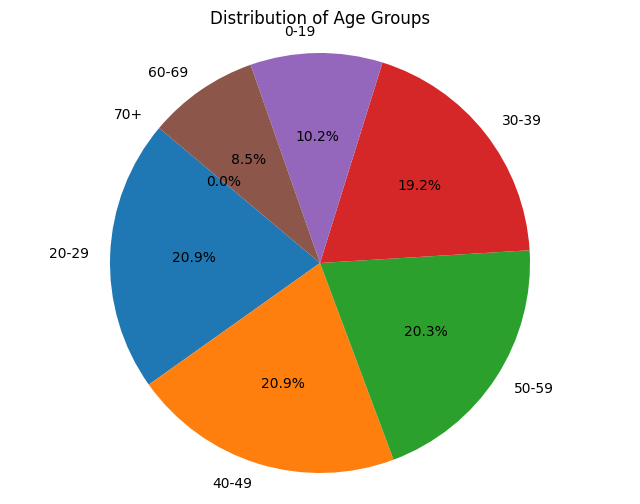

In [42]:
# Calculates descriptive statistics for the "age" column of the DataFrame
print('Descriptive Statistics for Age')
final_data["age"].describe()

# Plot histogram
plt.hist(final_data["age"], bins=12, range=(10, 65), edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Pie Chart

# Define age categories
age_bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]

# Adjusting labels to match the number of bins
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Cut the 'age' column into bins
final_data['age_group'] = pd.cut(final_data['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of each category in 'age_group' column
age_counts = final_data['age_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

BMI (Body Mass Index)

Descriptive Statistics for BMI


count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

(array([ 30., 127., 234., 318., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of BMI')

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Frequency')

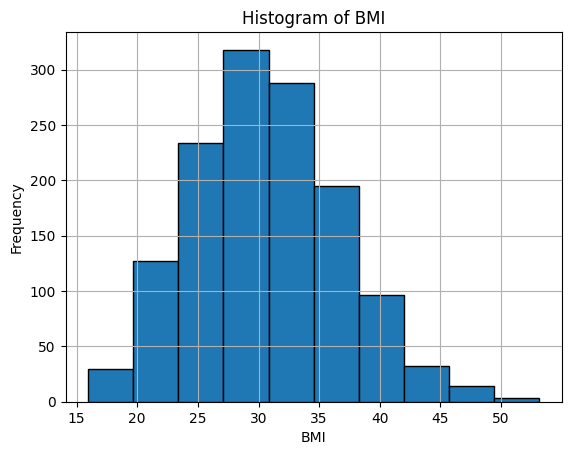

In [43]:
# Calculates descriptive statistics for the "BMI" column of the DataFrame
print('Descriptive Statistics for BMI')
final_data["bmi"].describe()

# Plot histogram
plt.hist(final_data["bmi"], bins=10, edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Medical Charges

Descriptive Statistics for Insurance Charge


count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

(array([535., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of Charges')

Text(0.5, 0, 'Charges ($)')

Text(0, 0.5, 'Frequency')

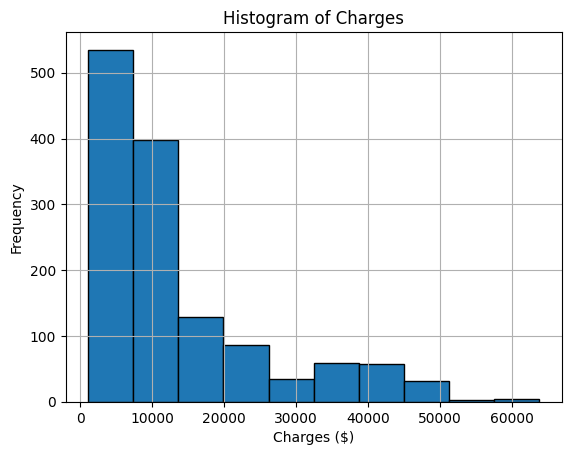

In [44]:
# Calculates descriptive statistics for the "Charges" column of the DataFrame
print('Descriptive Statistics for Insurance Charge')
final_data["charges"].describe()

# Plot histogram
plt.hist(final_data["charges"], bins=10, edgecolor='black')
plt.title('Histogram of Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Sex


Descriptive Statistics for Insurance Charge


count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d7c67d25450>,
 [Text(-0.69411434532236, -0.8533494451968149, 'male'),
  Text(0.6941142654260158, 0.8533495101844862, 'female')],
 [Text(-0.37860782472128723, -0.4654633337437172, '50.5%'),
  Text(0.37860778114146315, 0.4654633691915379, '49.5%')])

Text(0.5, 1.0, 'Sex Distribution')

(-1.0999996519344086,
 1.099996730453448,
 -1.0999996357075215,
 1.0999977623962425)

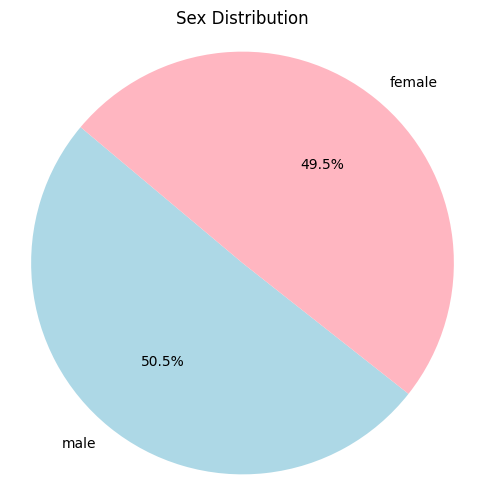

Percentages of Male and Female in Sample


sex
female    49.513837
male      50.486163
dtype: float64

In [45]:
# Calculates descriptive statistics for the "Sex" column of the DataFrame
print('Descriptive Statistics for Insurance Charge')
final_data["sex"].describe()

# Count the number of males and females
sex_counts = final_data['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculate & print percentages of males and females in the sample data
print('Percentages of Male and Female in Sample')
(final_data.groupby('sex').size()/final_data['sex'].count())*100

Smoker

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object


<Axes: >

([<matplotlib.patches.Wedge at 0x7d7c67da3f70>,
 [Text(0.2495303486661688, -1.0713237629654913, 'no'),
  Text(-0.24953029851388406, 1.071323774646849, 'yes')],
 [Text(0.13610746290881934, -0.5843584161629952, '79.5%'),
  Text(-0.13610743555302765, 0.5843584225346448, '20.5%')])

Text(0.5, 1.0, 'Smoker vs Nonsmoker')

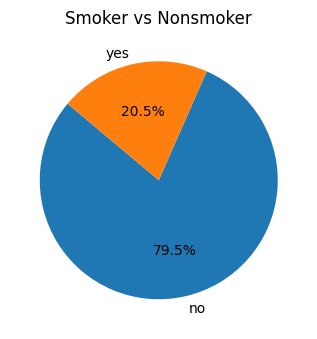

In [46]:
# Descriptive statistics for the smoker column
smoker_descriptive = final_data['smoker'].describe()
print (final_data['smoker'].describe())

# Prepare data for pie chart
smoker_counts = final_data['smoker'].value_counts()

# Plotting pie chart for smoker/nonsmoker
plt.subplot(1, 2, 2)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Smoker vs Nonsmoker')

plt.tight_layout()
plt.show()

Region

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object


<Figure size 1000x500 with 0 Axes>

<Axes: >

([<matplotlib.patches.Wedge at 0x7d7c67d25f30>,
 [Text(-1.0864414464045415, -0.17217718645165447, 'southeast'),
  Text(0.22429059554104228, -1.0768907691831353, 'southwest'),
  Text(1.0860338821896398, 0.17472952451174234, 'northwest'),
  Text(-0.12223330243684039, 1.093187550137388, 'northeast')],
 [Text(-0.5926044253115681, -0.0939148289736297, '27.2%'),
  Text(0.1223403248405685, -0.5873949650089828, '24.3%'),
  Text(0.5923821175579853, 0.09530701337004126, '24.2%'),
  Text(-0.06667271042009475, 0.596284118256757, '24.2%')])

Text(0.5, 1.0, 'Region Distribution')

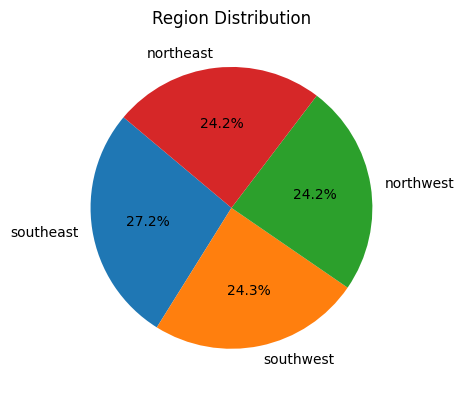

In [47]:
# Descriptive statistics for the smoker column
smoker_descriptive = final_data['region'].describe()
print (final_data['region'].describe())

# Prepare data for pie chart
region_counts = final_data['region'].value_counts()

# Plotting pie chart for region
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Region Distribution')

Number of Children

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


<Figure size 1000x500 with 0 Axes>

<Axes: >

([<matplotlib.patches.Wedge at 0x7d7c67d31030>,
 [Text(-0.876845749061576, -0.6641848630860567, '0'),
  Text(1.0192230897018089, -0.41374423671961713, '1'),
  Text(0.6490936772246307, 0.8880751084153902, '2'),
  Text(-0.3268367858657139, 1.0503226720417729, '3'),
  Text(-0.7330080000186525, 0.8201824625707717, '4'),
  Text(-0.8119987055297291, 0.7420634084888195, '5')],
 [Text(-0.4782794994881323, -0.3622826525923945, '42.9%'),
  Text(0.5559398671100775, -0.2256786745743366, '24.2%'),
  Text(0.3540510966679804, 0.4844046045902128, '18.0%'),
  Text(-0.17827461047220755, 0.5729032756591488, '11.7%'),
  Text(-0.3998225454647195, 0.44737225231132993, '1.9%'),
  Text(-0.44290838483439765, 0.40476185917571966, '1.3%')])

Text(0.5, 1.0, 'Number of Children Distribution')

<Axes: >

Text(0.1, 0.9, 'count    1337.000000\nmean        1.095737\nstd         1.205571\nmin         0.000000\n25%         0.000000\n50%         1.000000\n75%         2.000000\nmax         5.000000')

(0.0, 1.0, 0.0, 1.0)

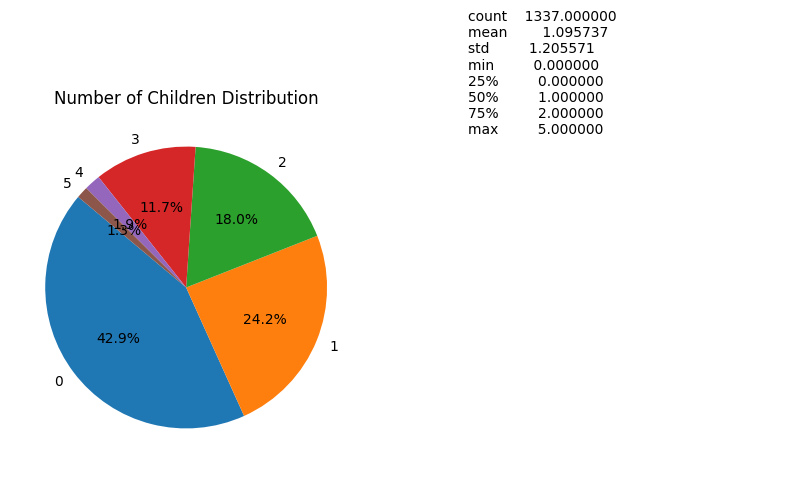

In [48]:
# Descriptive statistics for the number of children column
children_descriptive = final_data['children'].describe()
print(children_descriptive)

# Prepare data for pie chart
children_counts = final_data['children'].value_counts()

# Plotting pie chart for number of children
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Children Distribution')

# Show descriptive statistics
plt.subplot(1, 2, 2)
plt.text(0.1, 0.9, children_descriptive.to_string(), fontsize=10, ha='left')  # Convert Series to string using to_string()
plt.axis('off')  # Hide axes
plt.show()

##4. Statistical Tests


**Correlations**
- Pearson correlation coefficient (r) measuring linear correlation

Age

Steps include finding r and R-squared value.

In [49]:
from scipy.stats import pearsonr

p = pearsonr(final_data["age"],final_data["charges"])
print ("r:", p[0])

r_squared = p[0] ** 2
print("R-squared:", r_squared)

r: 0.29830821250978634
R-squared: 0.08898778965078386


BMI (Body Mass Index)

Steps include finding and printing r and the R-squared value.

In [50]:
from scipy.stats import pearsonr

p = pearsonr(final_data["bmi"],final_data["charges"])
print ("r:", p[0])

r_squared = p[0] ** 2
print("R-squared:", r_squared)

r: 0.19840083122624938
R-squared: 0.03936288983126669


Correlation Matrix

Steps include selecting only numerical columns for correlation calculation,computing the correlation matrix, and plotting the heat map.

               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


<Axes: >

Text(0.5, 1.0, 'Correlation Matrix: Age, BMI, and Charges')

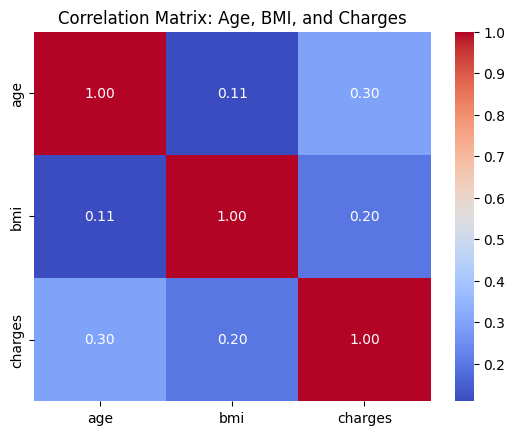

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for correlation calculation
numerical_df = final_data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()
print (correlation_matrix)

# Calculate correlation matrix
corr_matrix = final_data[['age', 'bmi', 'charges']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Age, BMI, and Charges')
plt.show()

**T-Tests**
- Determine if there is a significant difference between the means of two groups
- T-statistic measures the size of the difference relative to the variation in the sample data
- P-Value validate a hypothesis against observed data (hypothesis)
We considered a p-value below 0.05 to be statistically significant.

Sex
- Male/Female

Steps include seperating male and female, performing the t-test and printing the p-value and interpretations.  

In [52]:
from scipy.stats import ttest_ind

# Separate male and female data
male_data = final_data[final_data['sex'] == 'male']['charges']
female_data = final_data[final_data['sex'] == 'female']['charges']

# Performing the t-test
t_statistic, p_value = ttest_ind(male_data, female_data, nan_policy='omit')

# Printing the T-statistic and P-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if not np.isnan(t_statistic) and not np.isnan(p_value):
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")
else:
    print("Unable to perform t-test due to missing data.")


T-Statistic: 2.124391307062026
P-Value: 0.0338207919951195
Reject the null hypothesis. There is a significant difference between the two groups.


Smoker
- Smoker/Non-smoker

Steps include data

In [53]:
import pandas as pd
from scipy.stats import ttest_ind

# Create DataFrame
df = pd.DataFrame(final_data)

# Separate smoker and nonsmoker data
smoker_data = df[df['smoker'] == 'yes']['charges']
nonsmoker_data = df[df['smoker'] == 'no']['charges']

# Performing the t-test
t_statistic, p_value = ttest_ind(smoker_data, nonsmoker_data, nan_policy='omit')

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")


T-Statistic: 46.64479459840305
P-Value: 1.4067220949376498e-282
Reject the null hypothesis. There is a significant difference between the two groups.


**ANOVA Test**
- Determine if there is a significant difference between the means of any two groups and how they are related.
- F-statistic measures the size of the difference relative to the variation in the sample data
- P-Value validate a hypothesis against observed data (hypothesis)
We considered a p-value below 0.05 to be statistically significant.

Region

Steps for ANOVA:

Create a list of charges for each region

Perform ANOVA test

Print ANOVA table

Create a list of charges for each number of children

Print results, interpretation, and table

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway  # Add this import statement

# Create a list of charges for each region
df = final_data
region_groups = [df[df['region'] == 'southwest']['charges'],
                 df[df['region'] == 'southeast']['charges'],
                 df[df['region'] == 'northwest']['charges'],
                 df[df['region'] == 'northeast']['charges']]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*region_groups)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in charges among different regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in charges among different regions.")

# Perform ANOVA
model = ols('charges ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)


F-Statistic: 2.926139903662776
P-Value: 0.03276288025444947
Reject the null hypothesis. There is a significant difference in charges among different regions.
                 sum_sq      df        F    PR(>F)
C(region)  1.281906e+09     3.0  2.92614  0.032763
Residual   1.946569e+11  1333.0      NaN       NaN


Number of Children

Steps for ANOVA:

Perform ANOVA

Print ANOVA table

Create a list of charges for each number of children

Perform ANOVA test

Print results and interpretation

In [55]:
# Perform ANOVA
model = ols('charges ~ C(children)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Create a list of charges for each number of children
children_groups = []
for num_children in df['children'].unique():
    children_groups.append(df[df['children'] == num_children]['charges'])

# Perform ANOVA test
f_statistic, p_value = f_oneway(*children_groups)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in charges based on the number of children.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in charges based on the number of children.")

                   sum_sq      df         F    PR(>F)
C(children)  2.376795e+09     5.0  3.268734  0.006133
Residual     1.935620e+11  1331.0       NaN       NaN
F-Statistic: 3.268734410119573
P-Value: 0.006133448188169501
Reject the null hypothesis. There is a significant difference in charges based on the number of children.


Linear Regression
- For non-catagorical factors (Age & BMI)
- The coefficeints and intercepts are used for the equation of the line of best fit.
- The mean squared error tells us the average squared difference between the predicted and actual values.

**Age**

Steps for linear regression:

Split the data into training and testing sets

Create and fit the linear regression model

Make predictions on the test set

Print model coefficients

Evaluate the model

Plot the regression line

LinearRegression()

Coefficients: [242.2581519]
Intercept: 3534.0917330710636
Mean Squared Error: 166275348.23176482
R^2 Score: 0.09513000782072023


Text(0.5, 0, 'Age')

Text(0, 0.5, 'Charges ($)')

Text(0.5, 1.0, 'Linear Regression: Age vs Charges')

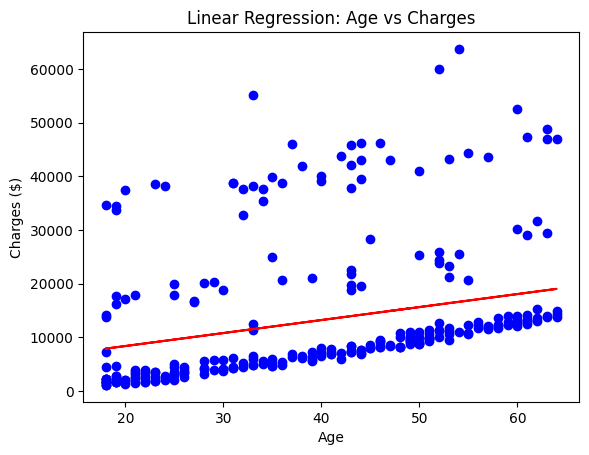

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data for linear regression
X = final_data[['age']]
y = final_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.title('Linear Regression: Age vs Charges')
plt.show()

BMI

Steps for linear regression:

Split the data into training and testing sets

Create and fit the linear regression model

Make predictions on the test set

Print model coefficients

Evaluate the model

Plot the regression line

LinearRegression()

Coefficients: [345.16978692]
Intercept: 2488.571161649981
Mean Squared Error: 174251720.52203974
R^2 Score: 0.051722611542952324


Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Charges ($)')

Text(0.5, 1.0, 'Linear Regression: BMI vs Charges')

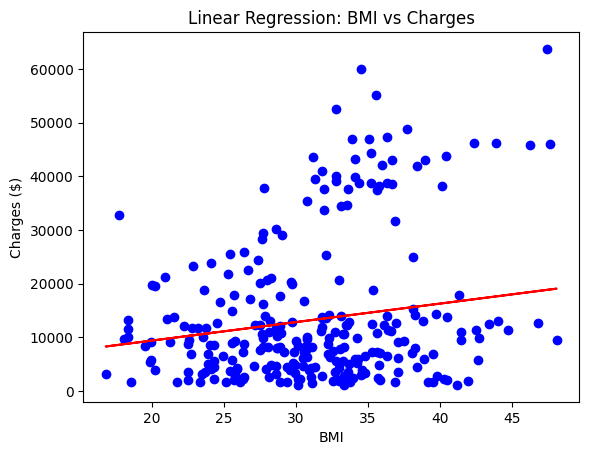

In [59]:
# Prepare the data for linear regression
X = final_data[['bmi']]
y = final_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.title('Linear Regression: BMI vs Charges')
plt.show()

##5. Data Visualization

Box Plots
- Show distributions of numeric data values, especially between multiple groups. Through this method, we can identify outliers and the quartiles.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='age', ylabel='charges'>

Text(0.5, 1.0, 'Age vs Charges')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Charges ($)')

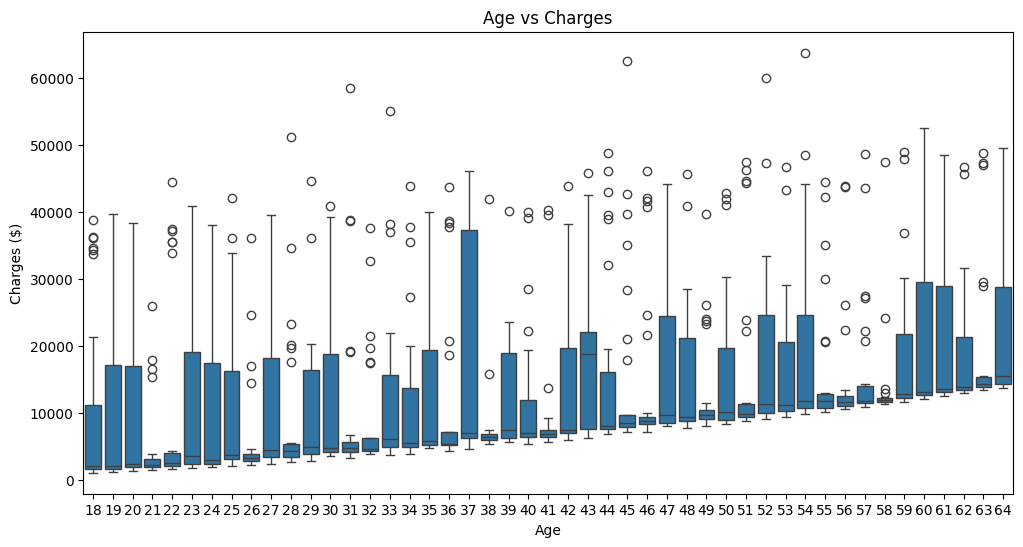

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='bmi', ylabel='charges'>

Text(0.5, 1.0, 'BMI vs Charges')

Text(0.5, 0, 'BMI')

Text(0, 0.5, 'Charges ($)')

(20.0, 40.0)

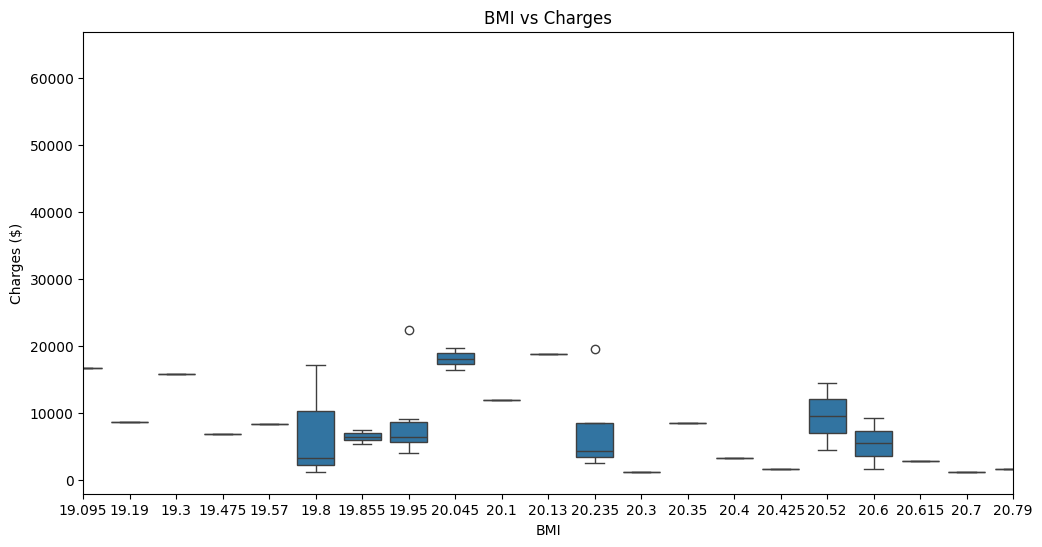

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='sex', ylabel='charges'>

Text(0.5, 1.0, 'Sex vs Charges')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Charges ($)')

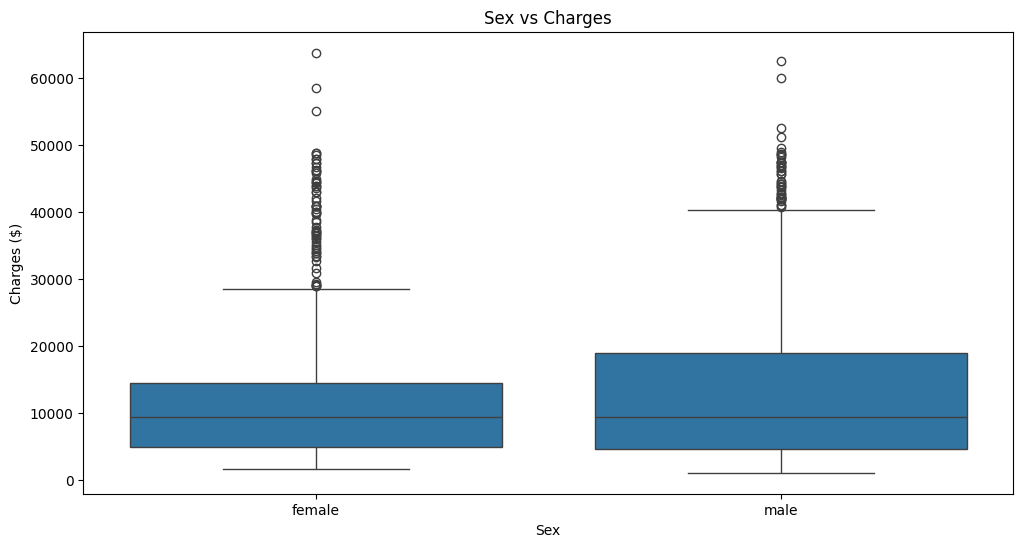

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='smoker', ylabel='charges'>

Text(0.5, 1.0, 'Smoker vs Charges')

Text(0.5, 0, 'Smoker')

Text(0, 0.5, 'Charges($)')

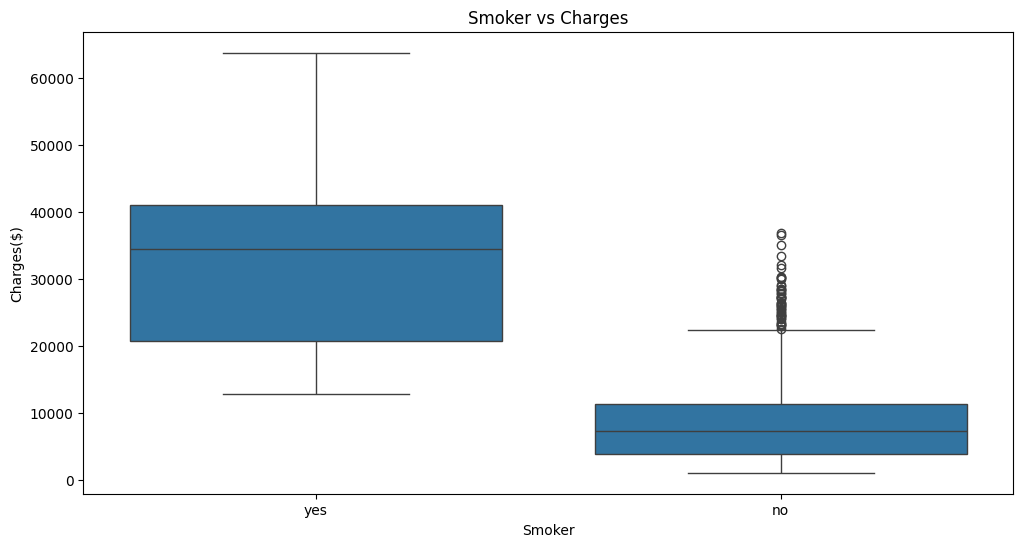

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='region', ylabel='charges'>

Text(0.5, 1.0, 'Region vs Charges')

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Charges ($)')

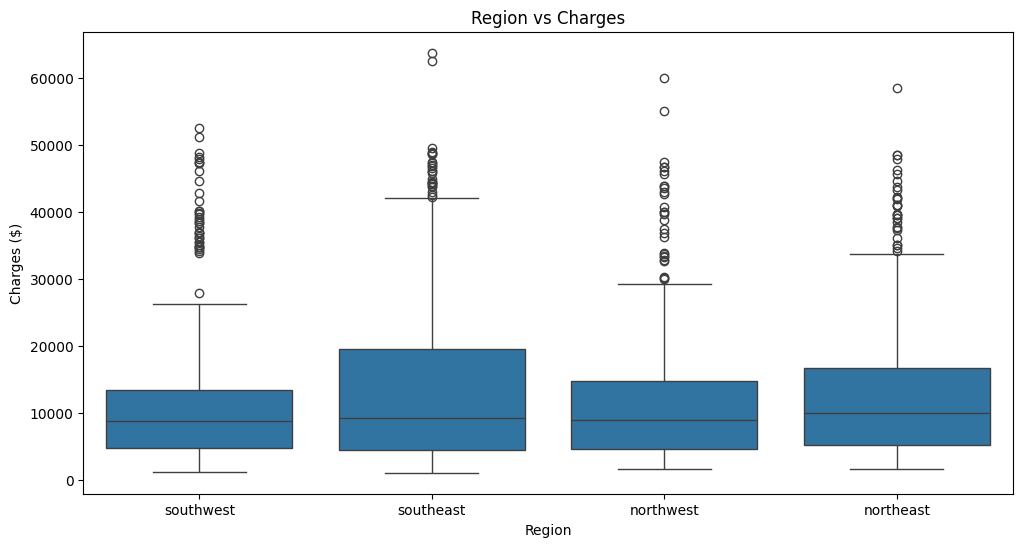

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='children', ylabel='charges'>

Text(0.5, 1.0, 'Children vs Charges')

Text(0.5, 0, 'Children')

Text(0, 0.5, 'Charges($)')

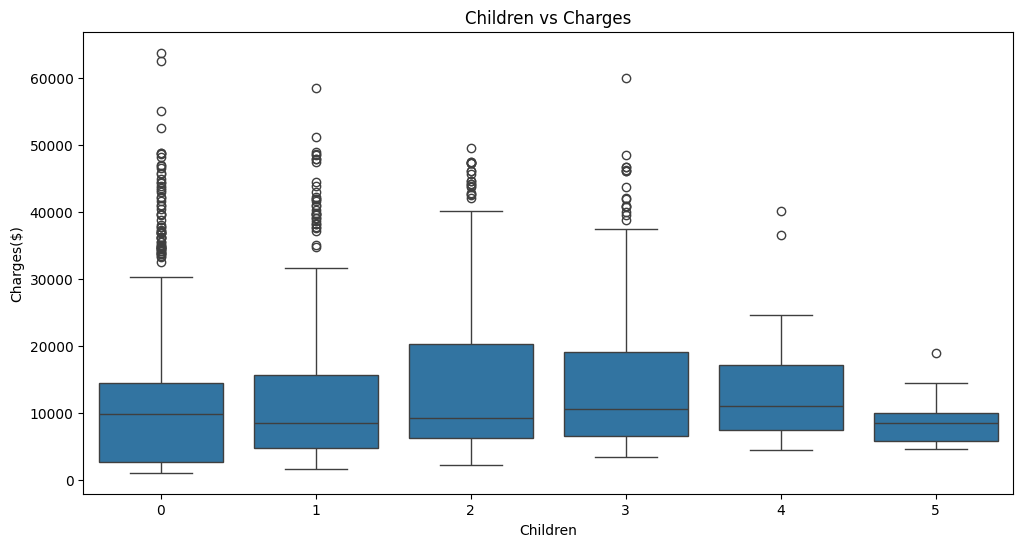

In [58]:
# Plotting box plots

# Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

# BMI
desired_ticks = np.arange(15, 46, 5)
plt.figure(figsize=(12, 6))
sns.boxplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.xlim(20, 40)  # Set limits for BMI axis
plt.show()

# Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges ($)')
plt.show()

# Smoker
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges($)')
plt.show()

# Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.show()

# Children
plt.figure(figsize=(12, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges($)')
plt.show()

# Data License: Released under MIT License

Copyright (c) 2013 Mark Otto.

Copyright (c) 2017 Andrew Fong.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Sources

M Rahul Vyas. (2024). Medical Insurance Cost Prediction. Kaggle.com. https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction



GeeksforGeeks. (2018, June 10). EDA Exploratory Data Analysis in Python. GeeksforGeeks; GeeksforGeeks. https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

T-test with Python. (2015). Pythonfordatascience.org. https://www.pythonfordatascience.org/independent-samples-t-test-python/


Matplotlib Pie Charts. (2024). W3schools.com. https://www.w3schools.com/python/matplotlib_pie_charts.asp


Comparing several means (one-way ANOVA) — Learning Statistics with Python. (2022). Github.io. https://ethanweed.github.io/pythonbook/05.03-anova.html


Renesh Bedre. (2018, October 22). How to Perform ANOVA in Python. RS Blog. https://www.reneshbedre.com/blog/anova.html